In [2]:
%matplotlib inline
import utils; # reload(utils)
from utils import *
# from __future__ import division, print_function

In [26]:
path = 'data/glove/'
res_path = path+'results/'

## Preprocessing

... but you can't access it! So MDR has done, it, below...

### Download and unzip the data - MDR

(Don't re-run the below unless needed - it's >800Mb, and takes about 3-4 min to download)

Now the unzipping (15s, no output).

In [20]:
import zipfile
with zipfile.ZipFile(path + "glove.6B.zip","r") as zip_ref:
    zip_ref.extractall(path)

In [22]:
%ls $path

glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
glove.6B.200d.txt  glove.6B.50d.txt


### Process the data

In [28]:
import pickle
def get_glove(name):
    with open(path+ 'glove.' + name + '.txt', 'r') as f: lines = [line.split() for line in f]
    words = [d[0] for d in lines]
    vecs = np.stack(np.array(d[1:], dtype=np.float32) for d in lines)
    wordidx = {o:i for i,o in enumerate(words)}
    save_array(res_path+name+'.dat', vecs)
    pickle.dump(words, open(res_path+name+'_words.pkl','wb'))
    pickle.dump(wordidx, open(res_path+name+'_idx.pkl','wb'))

Takes just under 2 min, no output.

In [29]:
get_glove('6B.50d')
get_glove('6B.100d')
get_glove('6B.200d')
get_glove('6B.300d')

## Looking at the vectors

Then the following function will return the word vectors as a matrix, the word list, and the mapping from word to index.

In [30]:
def load_glove(loc):
    return (load_array(loc+'.dat'),
        pickle.load(open(loc+'_words.pkl','rb')),
        pickle.load(open(loc+'_idx.pkl','rb')))

In [31]:
vecs, words, wordidx = load_glove(res_path+'6B.50d')
vecs.shape

(400000, 50)

Here's the first 25 "words" in glove.

In [33]:
' '.join(words[:25])

'the , . of to and in a " \'s for - that on is was said with he as it by at ( )'

This is how you can look up a word vector.

In [34]:
def w2v(w): return vecs[wordidx[w]]

In [35]:
w2v('of')

array([ 0.7085,  0.5709, -0.4716,  0.1805,  0.5445,  0.726 ,  0.1816, -0.5239,  0.1038, -0.1757,
        0.0789, -0.3622, -0.1183, -0.8334,  0.1192, -0.1661,  0.0616, -0.0127, -0.5662,  0.0136,
        0.2285, -0.144 , -0.0675, -0.3816, -0.237 , -1.7037, -0.8669, -0.267 , -0.2589,  0.1767,
        3.8676, -0.1613, -0.1327, -0.6888,  0.1844,  0.0052, -0.3387, -0.079 ,  0.2419,  0.3658,
       -0.3473,  0.2848,  0.0757, -0.0622, -0.3899,  0.229 , -0.2162, -0.2256, -0.0939, -0.8037], dtype=float32)

Just for fun, let's take a look at a 2d projection of the first 350 words, using [T-SNE](http://distill.pub/2016/misread-tsne/).

In [38]:
## MDR: none of this seems to be needed?!
#reload(sys)
#sys.setdefaultencoding('utf8')   

In [41]:
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(vecs[:500])

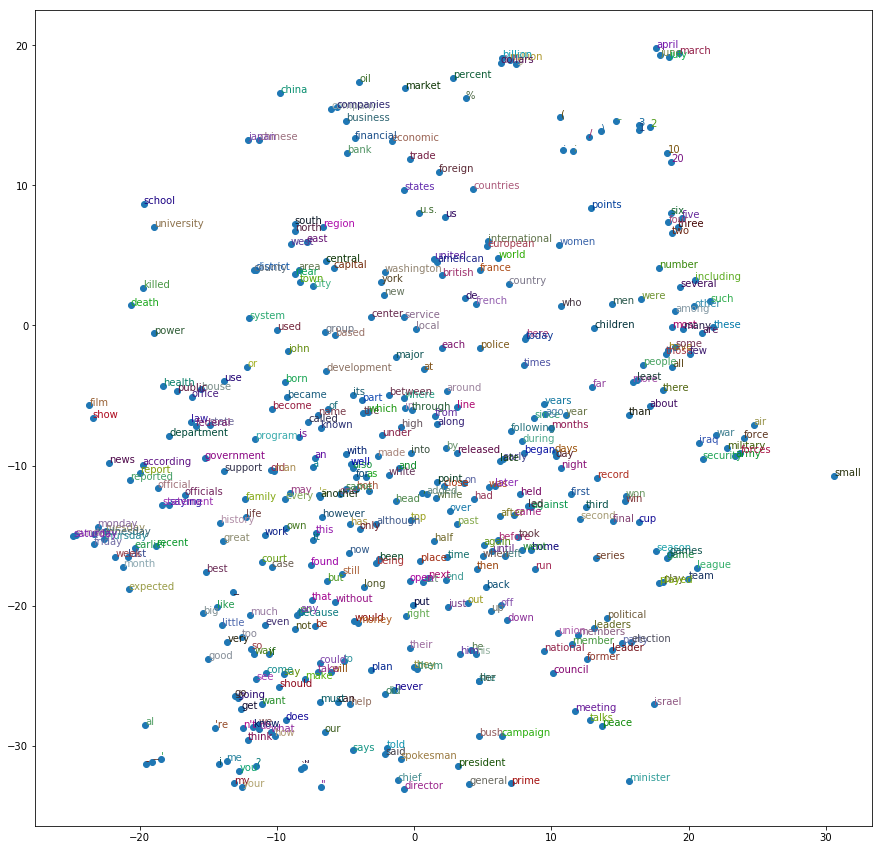

In [46]:
start=0; end=400
dat = Y[start:end]
plt.figure(figsize=(15,15))
plt.scatter(dat[:, 0], dat[:, 1])
for label, x, y in zip(words[start:end], dat[:, 0], dat[:, 1]):
    plt.text(x,y,label, color=np.random.rand(3)*0.7,
                 fontsize=10)
plt.show()